In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'F:\Intersnship\python\Datasets\airline-passengers.csv',usecols=[1], engine='python')

In [3]:
dataset.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [4]:
dataset

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


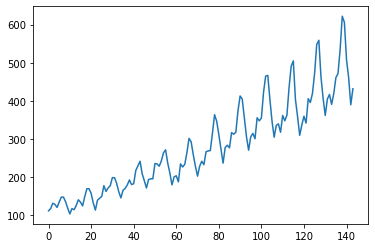

In [5]:
plt.plot(dataset)
plt.show()

In [6]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
# fix random seed for reproducibility
np.random.seed(7)

In [8]:
dataset = dataset.astype('float32')

In [9]:
#LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used.
#Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

108 36


In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
# use this function to prepare the train and test datasets for modeling.
#reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [13]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=80, batch_size=1, verbose=2)

Epoch 1/80
106/106 - 10s - loss: 0.0573
Epoch 2/80
106/106 - 0s - loss: 0.0286
Epoch 3/80
106/106 - 0s - loss: 0.0209
Epoch 4/80
106/106 - 0s - loss: 0.0186
Epoch 5/80
106/106 - 0s - loss: 0.0171
Epoch 6/80
106/106 - 0s - loss: 0.0156
Epoch 7/80
106/106 - 0s - loss: 0.0140
Epoch 8/80
106/106 - 0s - loss: 0.0125
Epoch 9/80
106/106 - 0s - loss: 0.0110
Epoch 10/80
106/106 - 0s - loss: 0.0095
Epoch 11/80
106/106 - 0s - loss: 0.0081
Epoch 12/80
106/106 - 0s - loss: 0.0069
Epoch 13/80
106/106 - 0s - loss: 0.0059
Epoch 14/80
106/106 - 0s - loss: 0.0049
Epoch 15/80
106/106 - 0s - loss: 0.0042
Epoch 16/80
106/106 - 0s - loss: 0.0036
Epoch 17/80
106/106 - 0s - loss: 0.0032
Epoch 18/80
106/106 - 0s - loss: 0.0030
Epoch 19/80
106/106 - 0s - loss: 0.0028
Epoch 20/80
106/106 - 0s - loss: 0.0026
Epoch 21/80
106/106 - 0s - loss: 0.0026
Epoch 22/80
106/106 - 0s - loss: 0.0026
Epoch 23/80
106/106 - 0s - loss: 0.0026
Epoch 24/80
106/106 - 0s - loss: 0.0025
Epoch 25/80
106/106 - 0s - loss: 0.0025
Epoch 26

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 25.31 RMSE
Test Score: 49.93 RMSE


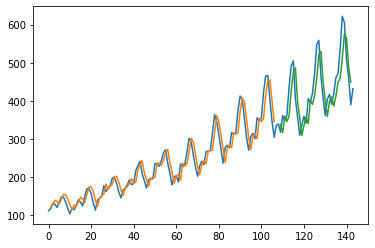

In [16]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()